# Transformers Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
 
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be part of the grades. Comments\
 however do not replace answers to explicit questions.

3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. The quality and depth of this\
 will be graded. Such questions might be asked in the final exams.

 4. Feel free to **experiment** with the methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods. 

In [29]:
# Run this to download the lemur image into the folder '../data'
#
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/lemur_img.png -P ../data

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


### Exercise 1 - Diffusion Process


**Summary:** 
In this exercise you will implement a simple forward diffusion process to gain deeper insights into the process. 

$x_t = \sqrt{1-\beta_{t-1}} x_{t-1} + \sqrt{\beta_{t-1}} \epsilon, \qquad  \epsilon \sim \mathcal{N}(0, I)$

**Hints:** 
Normalize your images after adding noise to prevent issues with pixel values running out of range. 


**Provided Code:** The cell below loads a sample image and performs min-max normalization on the initial $x_0$.


**Your Tasks in this exercise:**
1. Perform forward diffusion, experiment with different difussion schedules (values for beta)
2. Plot your images at each step of the diffusion process $x_0,...,x_T$ (use ```plt.subplots```)
3. Compute and visual the histogram over all pixel values at each step of the diffusion process $x_0,...,x_T$ (use ```plt.subplots```)



In [71]:
import cv2 
import numpy as np 

img = cv2.imread('../data/lemur_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x0 = (img - np.min(img)) / (np.max(img) - np.min(img))

### Exercise 2 - Maximum Likelihood


**Summary:** In this exercise you will use a brute force maximum likelihood approach. Even though    
this is not what we would do in real life it will help you understand the optimization target      
of diffusion models. 


**Hints:** Computing the product of a lot small numbers is numerically problematic. Find a way   
to improve this. 


**Provided Code:** The cell below generates data from a normal distribution with a fixed set of    
parameters. 

**Your Tasks in this exercise:**
1. Implement a brute force maximum likelihood method to predict the parameters used to generate the data 
2. Explain why maximum likelihood is important for diffusion models
3. Give another example where maximum likelihood is used in Machine Learning and explain the ideas


In [70]:
import numpy as np 
mu = 5
sigma = 2
y = mu + sigma *np.random.randn(5000)

### Exercise * - Monte Carlo Integration


**Summary:** In this exercise you will use a monte carlo method to estimate the value of an integral. Understanding this is\
essential to understanding the evidence lower bound (ELBO) used in variational inference which is the key idea behind variational\
autoencoders and diffusion models. 

$\int f(x) dx = \int f(x) \frac{g(x)}{g(x)} dx$, given that $g(x)$ is a density this is the same as   $\mathbb{E}_{x\sim g(\cdot)}\left[ \frac{f(x)}{g(x)} \right]$.




**Hints:** Below 


**Provided Code:** None


**Your Tasks in this exercise:**
1. Implement the ```scaled_dot_product_attention(Q, K, V)``` function.
2. Test your code against the results of ```torch.nn.functional.scaled_dot_product_attention```

In [3]:
import sys 
import numpy as np 

def f(x):
    return x**2

a = -10
b = 10

import numpy as np 

def g_uniform(x): # Uniform density is constant for all x
    return 1.0 / (b - a)

def sample_from_uniform(): # draw a random sample
    z = np.random.rand() # draws from [0,1)
    # Map linearly from 0,1 to a-b
    return (b-a) * z + a

In [28]:
# Estimate the expected value MC style:
#
mu = 0
sigma = 10

samples = []
for it in range(500000):
    x = sample_from_gaussian(mu, sigma)
    samples.append((f(x) / g_gaussian(x, mu, sigma)))

value = np.mean(samples)
print(value)

1976.931412874969


In [12]:
x = np.linspace(-100, 100, 100000)
y = g_gaussian(x, mu, sigma)

step = 100000 / 200

plt.plot(x,y)
print(np.sum(y) / step)

NameError: name 'plt' is not defined

In [154]:
values = []
for i in range(int(1e6)):
    x = sample_from_gaussian(mu, sigma)
    values.append(x)


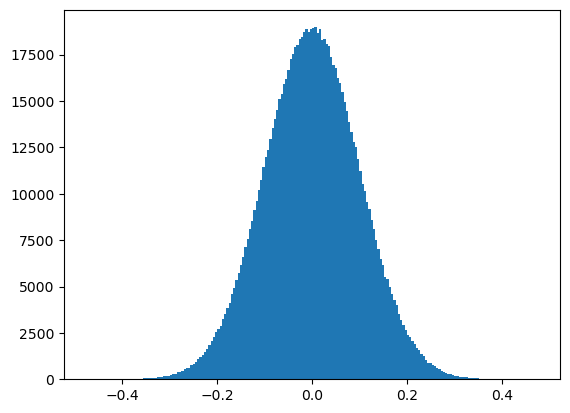

In [155]:
import matplotlib.pyplot as plt 

plt.hist(values, bins=200);